In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from matplotlib import pyplot as plt

In [4]:
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
dataset = pd.read_csv("IMDB Dataset.csv")

In [7]:
dataset

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


<AxesSubplot:xlabel='sentiment', ylabel='Count'>

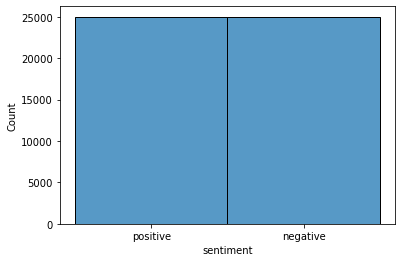

In [8]:
sns.histplot(dataset, x = 'sentiment')

In [9]:
dataset['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [10]:
dataset['review_word_length'] = dataset['review'].str.split().str.len()

In [11]:
dataset

,review,sentiment,review_word_length
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230
...,...,...,...
49995,I thought this movie did a down right good job...,positive,194
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,112
49997,I am a Catholic taught in parochial elementary...,negative,230
49998,I'm going to have to disagree with the previou...,negative,212


In [12]:
#dataset.plot(x = 'sentiment', y = 'review_word_length')

In [15]:
dataset.review_word_length.describe()

count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: review_word_length, dtype: float64

In [16]:
#dataset['review'][0]

array([<AxesSubplot:title={'center':'negative'}>,
       <AxesSubplot:title={'center':'positive'}>], dtype=object)

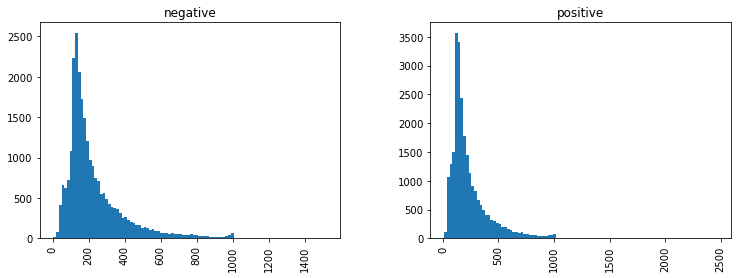

In [17]:
dataset.hist(column='review_word_length', by='sentiment', bins=100, figsize= (12,4))

In [18]:
import nltk

In [19]:
import string
from nltk.corpus import stopwords
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [20]:
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [21]:
X = dataset['review'].head(5).apply(text_process)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
#bow_transformer = CountVectorizer(analyzer=text_process).fit(dataset['review'])
#print(len(bow_transformer.vocabulary_))

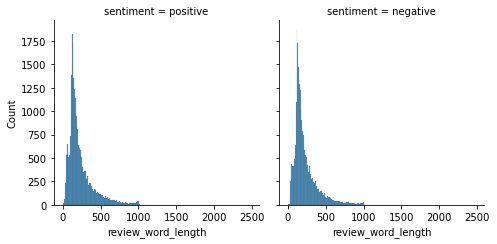

In [24]:
g = sns.FacetGrid(data = dataset, col = 'sentiment', height = 3.5)
g.map(sns.histplot,'review_word_length')

<AxesSubplot:xlabel='sentiment', ylabel='review_word_length'>

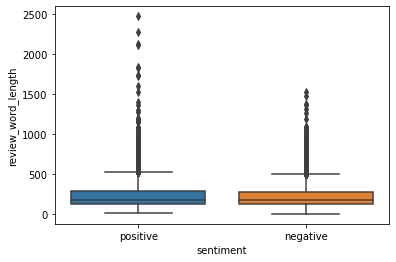

In [25]:
sns.boxplot(x = 'sentiment', y = 'review_word_length', data = dataset)

In [26]:
gb = dataset.groupby(['sentiment']).mean()
gb

,review_word_length
sentiment,
negative,229.46456
positive,232.84932


<AxesSubplot:ylabel='sentiment'>

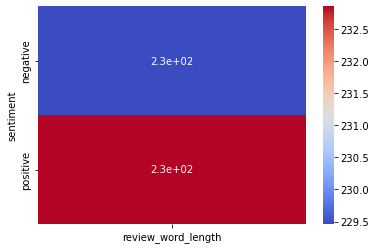

In [27]:
sns.heatmap(gb, cmap = 'coolwarm', annot = True)

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   review              50000 non-null  object
 1   sentiment           50000 non-null  object
 2   review_word_length  50000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [29]:
X = dataset['review']
y = dataset['sentiment']

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [31]:
X = cv.fit_transform(X)

In [33]:
from sklearn.model_selection import train_test_split 

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [35]:
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}  

In [ ]:
model = SVC()
model.fit(X_train, y_train)

In [ ]:
predictions = model.predict(X_test)


In [36]:
nb.fit(X_train, y_train)

MultinomialNB()

In [37]:
predictions = nb.predict(X_test)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
print(classification_report(predictions, y_test))
print(confusion_matrix(predictions, y_test))

              precision    recall  f1-score   support

    negative       0.88      0.83      0.85      8692
    positive       0.82      0.87      0.84      7808

    accuracy                           0.85     16500
   macro avg       0.85      0.85      0.85     16500
weighted avg       0.85      0.85      0.85     16500

[[7182 1510]
 [1026 6782]]


In [40]:
print(confusion_matrix(predictions, y_test))

[[7182 1510]
 [1026 6782]]


In [41]:
from sklearn.feature_extraction.text import TfidfTransformer

In [42]:
from sklearn.pipeline import Pipeline

In [43]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),
        
        ('classifier', MultinomialNB())
])

In [44]:
X = dataset['review']
y = dataset['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [45]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('classifier', MultinomialNB())])

In [46]:
predictions = pipeline.predict(X_test)

In [47]:
print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

    negative       0.83      0.87      0.85      8208
    positive       0.87      0.82      0.84      8292

    accuracy                           0.85     16500
   macro avg       0.85      0.85      0.85     16500
weighted avg       0.85      0.85      0.85     16500



[[7181 1027]
 [1510 6782]]


In [48]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__)

5.6.0


In [58]:
#pip install cufflinks

In [51]:
import cufflinks as cf

In [52]:
init_notebook_mode(connected=True)

In [53]:
cf.go_offline()

In [54]:
dataset2 = dataset.drop('review', axis = 1)

In [55]:
dataset2.iplot(kind='box', x = 'sentiment', y = 'reviewLength')

In [56]:
#dataset.iplot(kind='bar', x = 'sentiment', y = 'reviewLength')

In [57]:
dataset.describe()

,review_word_length
count,50000.000000
mean,231.156940
std,171.343997
min,4.000000
25%,126.000000
50%,173.000000
75%,280.000000
max,2470.000000
